## Import

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

## Data Preprocessing

In [2]:
df = pd.read_csv("IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df['species'].nunique()

3

In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Exploratory data analysis

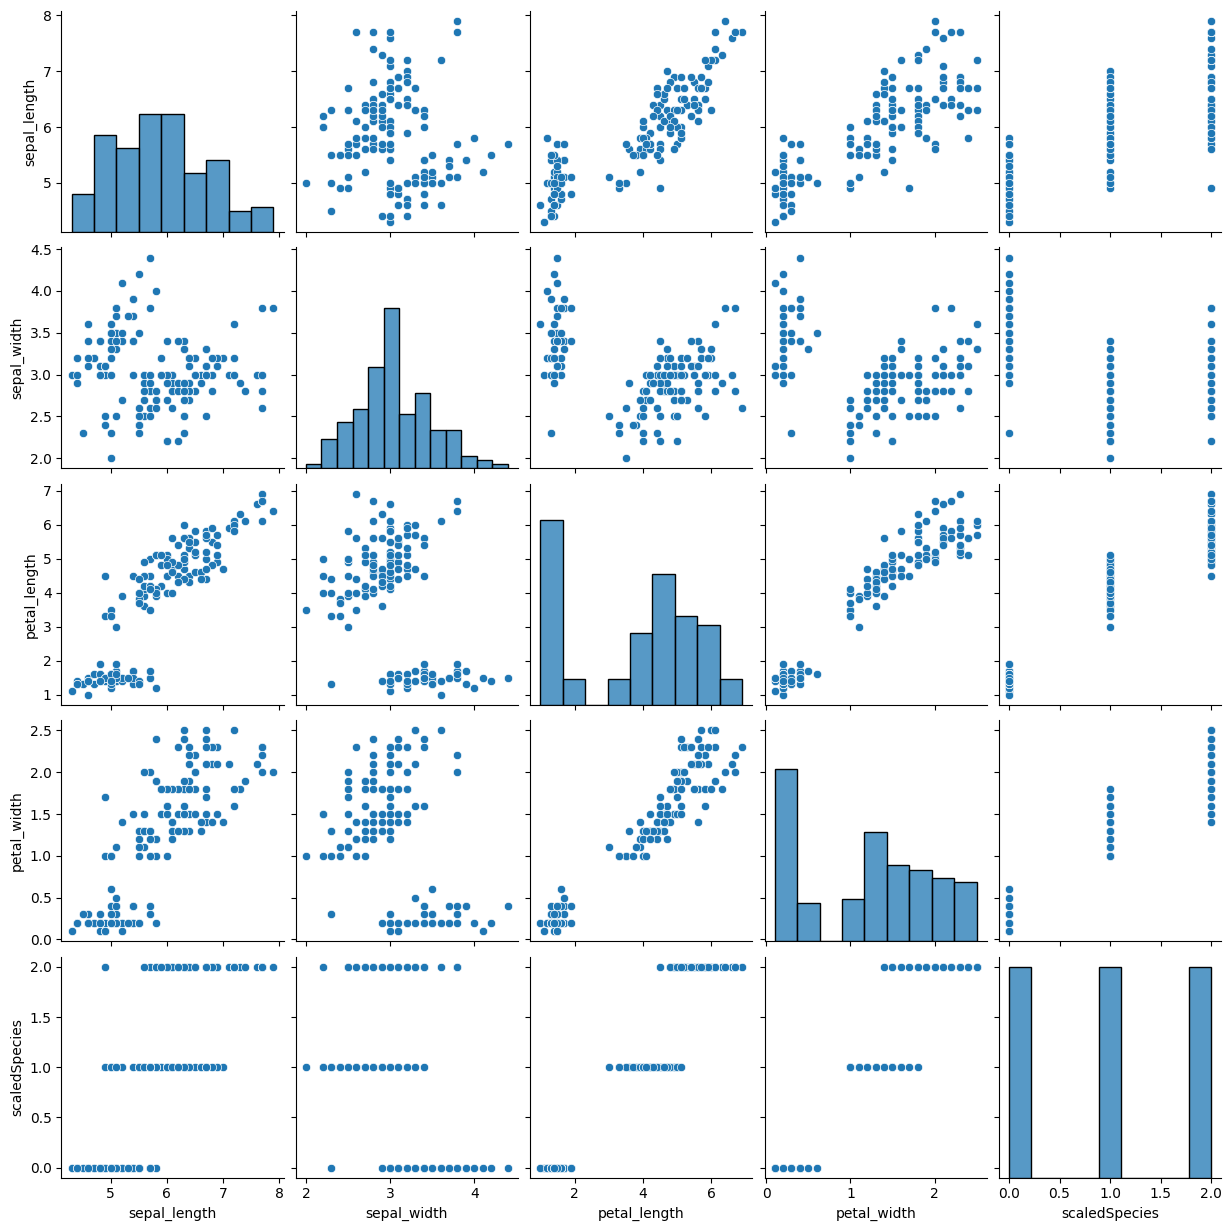

In [50]:
sns.pairplot(df)

C:\Users\indma\AppData\Local\Temp\ipykernel_6488\107776459.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


<Axes: ylabel='Density'>

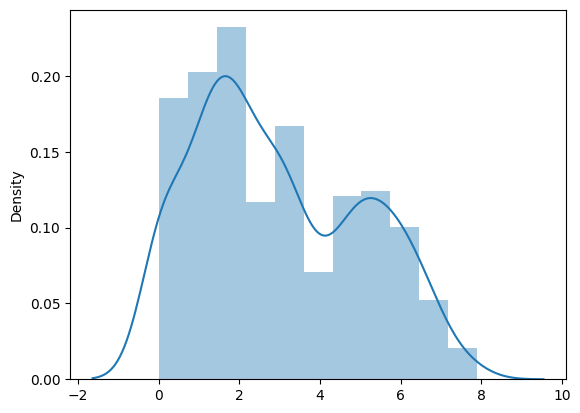

In [56]:
sns.distplot(df)

In [61]:
df['scaledSpecies']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: scaledSpecies, Length: 150, dtype: int32

<Axes: xlabel='scaledSpecies', ylabel='count'>

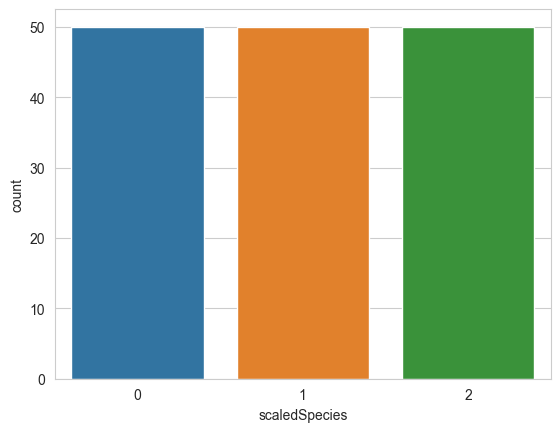

In [64]:
sns.set_style("whitegrid")
sns.countplot(x= df["scaledSpecies"],data=df)

## Encoder

In [20]:
label = LabelEncoder()

In [21]:
df["scaledSpecies"] = label.fit_transform(df["species"])

In [22]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,scaledSpecies
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [30]:
df.drop(["species"],axis=1, inplace=True)

In [31]:
label.inverse_transform(df['scaledSpecies'])

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [32]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,scaledSpecies
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Train test split

In [33]:
X = df.drop(["scaledSpecies"],axis=1)
Y = df['scaledSpecies']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [38]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
119,6.0,2.2,5.0,1.5
93,5.0,2.3,3.3,1.0
85,6.0,3.4,4.5,1.6
69,5.6,2.5,3.9,1.1
130,7.4,2.8,6.1,1.9


## Model

In [40]:
logistic = LogisticRegression()

In [41]:
logistic.fit(X_train,y_train)

LogisticRegression()

In [42]:
predict = logistic.predict(X_test)

In [44]:
predict

array([2, 2, 2, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2,
       2, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 0, 1, 0, 2, 0, 1, 2, 1, 1, 1, 2,
       1, 1, 0, 1, 0, 0])

In [45]:
y_test

128    2
108    2
143    2
19     0
41     0
50     1
149    2
59     1
6      0
12     0
36     0
99     1
22     0
34     0
42     0
105    2
76     1
67     1
20     0
120    2
60     1
116    2
107    2
23     0
49     0
100    2
114    2
43     0
117    2
56     1
78     1
132    2
83     1
48     0
87     1
37     0
145    2
45     0
80     1
127    2
81     1
64     1
94     1
70     1
63     1
97     1
30     0
55     1
47     0
0      0
Name: scaledSpecies, dtype: int32

## Metrics

In [48]:
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.89      0.94        18
           2       0.88      1.00      0.93        14

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [49]:
print(metrics.confusion_matrix(y_test,predict))

[[18  0  0]
 [ 0 16  2]
 [ 0  0 14]]
